In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [3]:
df = pd.read_csv('C:\\Users\\Gebruiker\\Downloads\\Invistico_Airline.csv')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


In [4]:
df.shape

(129880, 23)

In [5]:
# Exploratory Data Analysis
df['Type of Travel'].value_counts()

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

In [6]:
df['satisfaction_numb'] = df['satisfaction'].map({'satisfied' : 1, 'dissatisfied' : 0})

In [8]:
def unique_col_values(dataframe):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f'{columns} : {df[columns].unique()}')
unique_col_values(df)

Gender : ['Female' 'Male']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']
satisfaction : ['satisfied' 'dissatisfied']


Text(0, 0.5, 'Number of Customers')

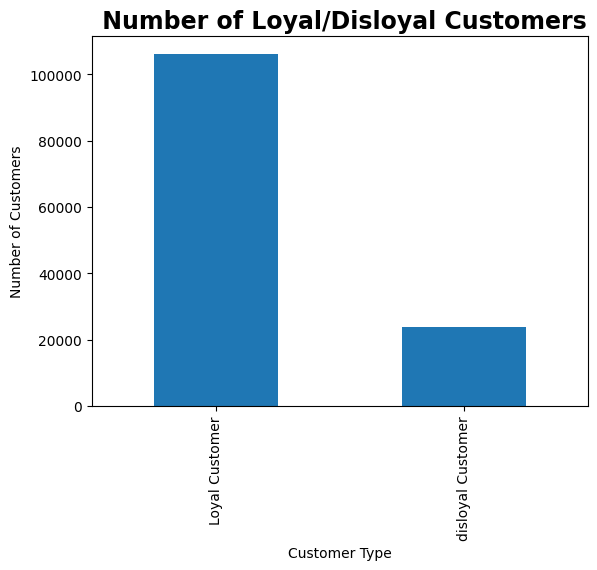

In [19]:
customer_type = df['Customer Type'].value_counts()
customer_type.plot(kind='bar')

plt.title(' Number of Loyal/Disloyal Customers', fontsize=17, fontweight = 'bold')
plt.xlabel('Customer Type')
plt.ylabel('Number of Customers')

In [10]:
df['Customer Type'].value_counts()

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

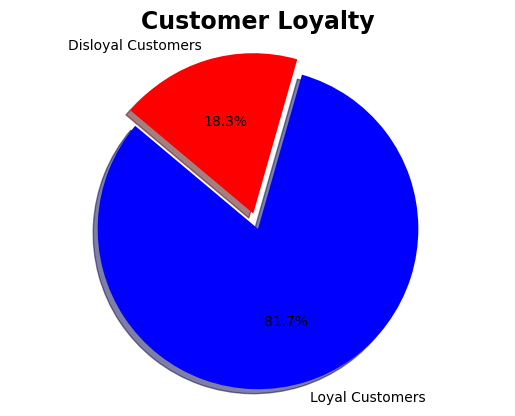

In [20]:
customer_type = df['Customer Type'].value_counts()

labels = 'Loyal Customers', 'Disloyal Customers'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(customer_type, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Customer Loyalty', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [15]:
business_travel_df = df[df['Type of Travel'] == 'Business travel']
personal_travel_df = df[df['Type of Travel'] == 'Personal Travel']

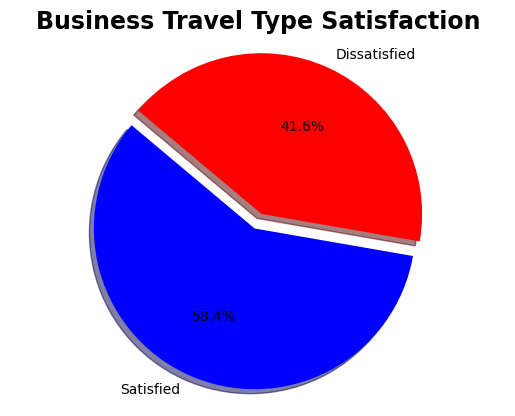

In [21]:
business_travel_satisfaction = business_travel_df['satisfaction'].value_counts()

labels = 'Satisfied', 'Dissatisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(business_travel_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Business Travel Type Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [22]:
business_travel_satisfaction

satisfaction
satisfied       52356
dissatisfied    37337
Name: count, dtype: int64

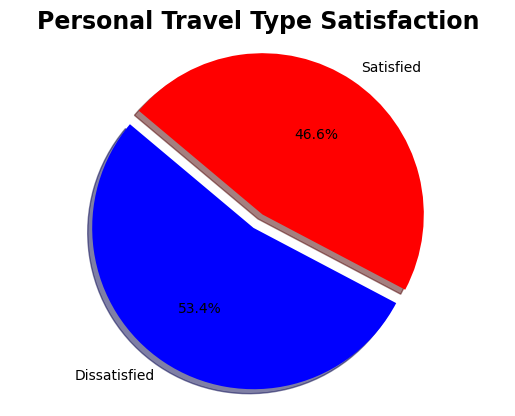

In [25]:
personal_travel_satisfaction = personal_travel_df['satisfaction'].value_counts()

labels = 'Dissatisfied', 'Satisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  

# Plot
plt.pie(personal_travel_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Personal Travel Type Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [26]:
personal_travel_satisfaction

satisfaction
dissatisfied    21456
satisfied       18731
Name: count, dtype: int64

In [27]:
satisfied_df = df[df['satisfaction_numb'] == 1 ]
dissatisfied_df = df[df['satisfaction_numb'] == 0 ]

Text(0, 0.5, 'Average Departure Delay (mins)')

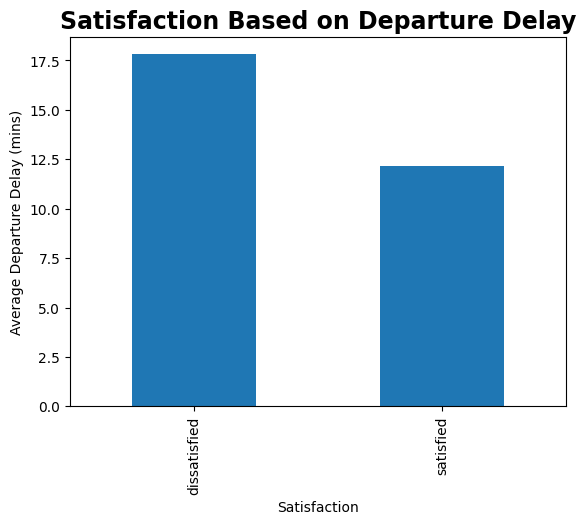

In [28]:
satisfaction_group = df.groupby('satisfaction')['Departure Delay in Minutes'].mean()

satisfaction_group.plot(kind='bar')

plt.title('Satisfaction Based on Departure Delay', fontsize=17,  fontweight = 'bold')
plt.xlabel('Satisfaction')
plt.ylabel('Average Departure Delay (mins)')

Text(0, 0.5, 'Average Arival Delay (mins)')

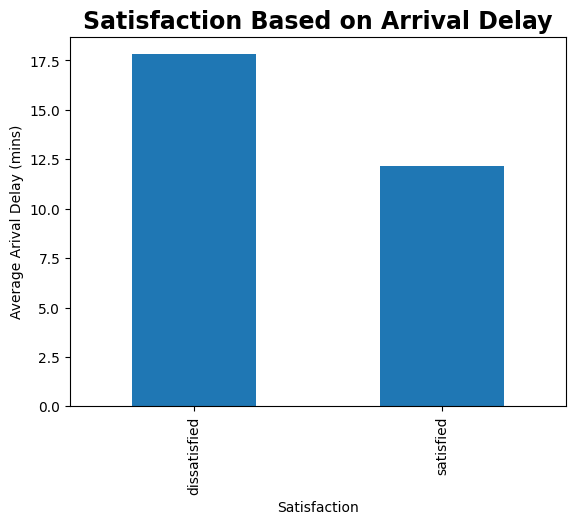

In [29]:
atisfaction_group = df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

satisfaction_group.plot(kind='bar')

plt.title('Satisfaction Based on Arrival Delay', fontsize=17,  fontweight = 'bold')
plt.xlabel('Satisfaction')
plt.ylabel('Average Arival Delay (mins)')

In [30]:
satisfied_class_count = satisfied_df['Class'].value_counts()
dissatisfied_class_count = dissatisfied_df['Class'].value_counts()

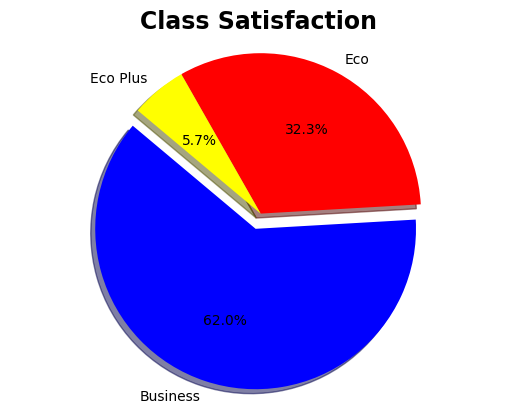

In [31]:
labels = 'Business', 'Eco', 'Eco Plus'
sizes = [215, 130, 245]
colors = ['blue', 'red', 'yellow']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(satisfied_class_count, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Class Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [33]:
satisfied_df['Class'].value_counts()

Class
Business    44095
Eco         22973
Eco Plus     4019
Name: count, dtype: int64

In [34]:
business_df = df[df['Class'] == 'Business']
eco_df = df[df['Class'] == 'Eco']
eco_plus_df = df[df['Class'] == 'Eco Plus']

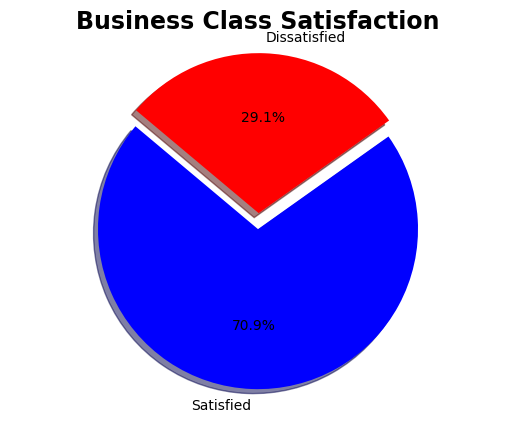

In [36]:
business_class_satisfaction = business_df['satisfaction'].value_counts()

labels = 'Satisfied', 'Dissatisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(business_class_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Business Class Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [37]:
business_travel_satisfaction

satisfaction
satisfied       52356
dissatisfied    37337
Name: count, dtype: int64

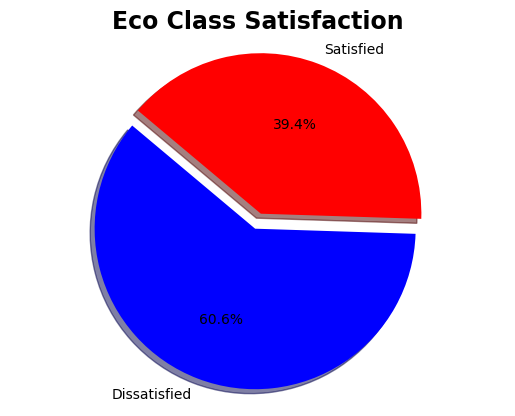

In [38]:
eco_class_satisfaction = eco_df['satisfaction'].value_counts()

labels = 'Dissatisfied', 'Satisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(eco_class_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Eco Class Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [39]:
eco_class_satisfaction

satisfaction
dissatisfied    35336
satisfied       22973
Name: count, dtype: int64

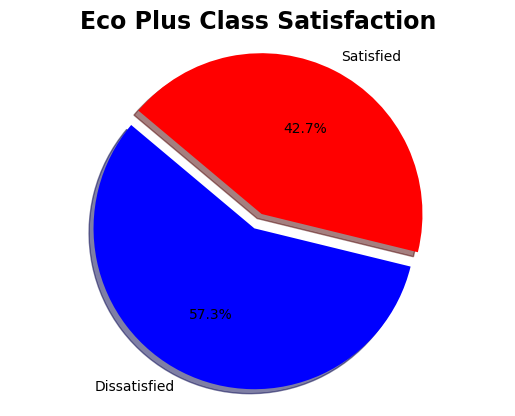

In [40]:
eco_plus_class_satisfaction = eco_plus_df['satisfaction'].value_counts()

labels = 'Dissatisfied', 'Satisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  

# Plot
plt.pie(eco_plus_class_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Eco Plus Class Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [41]:
eco_plus_class_satisfaction

satisfaction
dissatisfied    5392
satisfied       4019
Name: count, dtype: int64

In [42]:
satisfied_gender_count = satisfied_df['Gender'].value_counts()
dissatisfied_gender_count = dissatisfied_df['Gender'].value_counts()

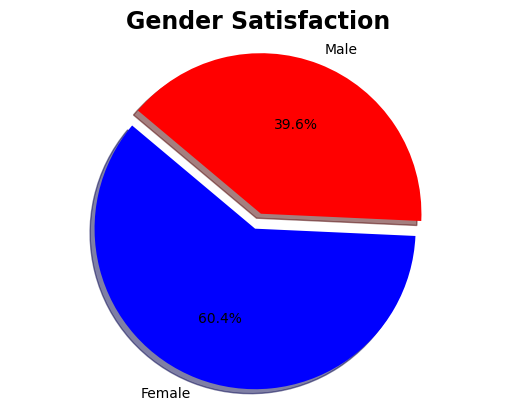

In [45]:
labels = 'Female','Male'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(satisfied_gender_count, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Gender Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [46]:
satisfied_df['Gender'].value_counts()

Gender
Female    42928
Male      28159
Name: count, dtype: int64

In [47]:
female_df = df[df['Gender'] == 'Female']
male_df = df[df['Gender'] == 'Male']

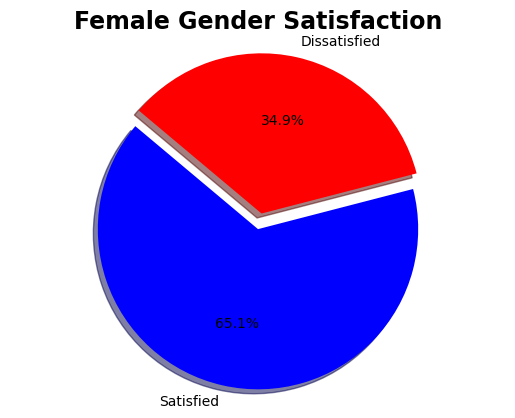

In [48]:
female_gender_satisfaction = female_df['satisfaction'].value_counts()

labels = 'Satisfied', 'Dissatisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,) 
# Plot
plt.pie(female_gender_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Female Gender Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [49]:
female_gender_satisfaction

satisfaction
satisfied       42928
dissatisfied    22971
Name: count, dtype: int64

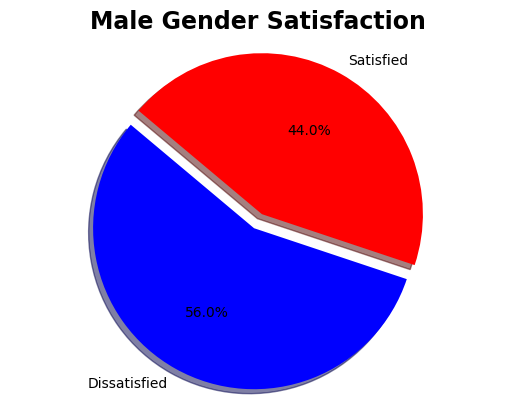

In [50]:
male_gender_satisfaction = male_df['satisfaction'].value_counts()

labels = 'Dissatisfied', 'Satisfied'
sizes = [215, 130]
colors = ['blue', 'red']
explode = (0.1, 0,)  # explode 1st slice

# Plot
plt.pie(male_gender_satisfaction, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Male Gender Satisfaction', fontsize=17,  fontweight = 'bold')

plt.axis('equal')
plt.show()

In [51]:
male_gender_satisfaction

satisfaction
dissatisfied    35822
satisfied       28159
Name: count, dtype: int64

In [52]:
df.shape

(129880, 24)

In [54]:
# Let's train the model
df_copy = df.copy()

In [55]:
df_copy.drop('satisfaction_numb', axis='columns', inplace=True)

In [56]:
df_copy.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,3,3,0,3,5,3,2,0,0.0,satisfied
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,3,4,4,4,2,3,2,310,305.0,satisfied
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,3,3,4,4,4,2,0,0.0,satisfied
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,1,1,0,1,4,1,3,0,0.0,satisfied
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,2,2,0,2,4,2,5,0,0.0,satisfied


In [57]:
unique_col_values(df_copy)

Gender : ['Female' 'Male']
Customer Type : ['Loyal Customer' 'disloyal Customer']
Type of Travel : ['Personal Travel' 'Business travel']
Class : ['Eco' 'Business' 'Eco Plus']
satisfaction : ['satisfied' 'dissatisfied']


In [61]:
df_copy.replace({'satisfied' : 1,'dissatisfied' : 0,'Female': 1,'Male' : 0,'Loyal Customer' : 1,'disloyal Customer' : 0,'Personal Travel' : 1,'Business travel' : 0}, inplace=True)

In [62]:
df1 = pd.get_dummies(df_copy, columns=['Class'], drop_first='True')

In [63]:
cols_to_scale = ['Age', 'Flight Distance','Gate location', 'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [64]:
df1 = df1.dropna()

In [65]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Eco,Class_Eco Plus
0,1,1,0.743590,1,0.031155,0,0,0,0.4,0.4,...,0.0,0.50,1.0,0.6,0.4,0.000000,0.000000,1,True,False
1,0,1,0.512821,1,0.349804,0,0,0,0.6,0.0,...,0.8,0.75,0.4,0.6,0.4,0.194724,0.192551,1,False,False
2,1,1,0.102564,1,0.302565,0,0,0,0.6,0.4,...,0.6,0.75,0.8,0.8,0.4,0.000000,0.000000,1,True,False
3,1,1,0.679487,1,0.083031,0,0,0,0.6,0.6,...,0.0,0.00,0.8,0.2,0.6,0.000000,0.000000,1,True,False
4,1,1,0.807692,1,0.044052,0,0,0,0.6,0.8,...,0.0,0.25,0.8,0.4,1.0,0.000000,0.000000,1,True,False


In [66]:
X = df1.drop('satisfaction', axis='columns')
y = df1.satisfaction

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [68]:
yp = model.predict(X_test)
yp[:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [69]:
y_test[:5]

87828     1
113431    1
129051    1
99669     1
79437     0
Name: satisfaction, dtype: int64

In [70]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [72]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     11736
           1       0.85      0.85      0.85     14162

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

